<a href="https://colab.research.google.com/github/Abhi-1441/ML-Lab-Assignments/blob/main/Assg5_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K means Clustering

### import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### load dataset

In [ ]:
data = pd.read_csv("loan_train.csv")

In [ ]:
print(data.columns)
print(data.shape)
print(data.head)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')
(614, 12)
<bound method NDFrame.head of      Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0      Male      No          0      Graduate            No            584900   
1      Male     Yes          1      Graduate            No            458300   
2      Male     Yes          0      Graduate           Yes            300000   
3      Male     Yes          0  Not Graduate            No            258300   
4      Male      No          0      Graduate            No            600000   
..      ...     ...        ...           ...           ...               ...   
609  Female      No          0      Graduate            No            290000   
610    Male     Yes         3+      Graduate            No            410600   
611    Male     Yes          1

In [ ]:
X = data.iloc[:, [5,7]].values
X[0]
X[1]

array([  458300, 12800000], dtype=int64)

### initializing kmeans clustering

[4.786883972462384e+16]
[4.786883972462384e+16, 2.050583610229053e+16]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16, 7058927946405293.0]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16, 7058927946405293.0, 5452600321105504.0]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16, 7058927946405293.0, 5452600321105504.0, 4099617476928105.5]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16, 7058927946405293.0, 5452600321105504.0, 4099617476928105.5, 2405889891077614.5]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16, 7058927946405293.0, 5452600321105504.0, 4099617476928105.5, 2405889891077614.5, 1980714426836634.5]
[4.786883972462384e+16, 2.050583610229053e+16, 1.1246148022217642e+16, 7058927946405293.0, 5452600321105504.0, 4099617476928105.5, 2405889891077614.5, 1980714426836634.5, 1368599990390133.8]
[4.786883972

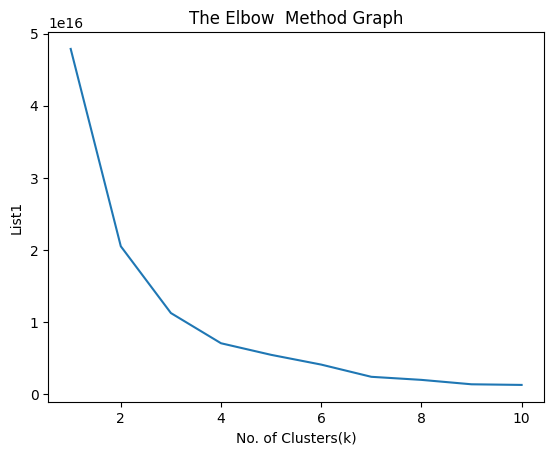

In [ ]:
from sklearn.cluster import KMeans
list1 = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)
    print(list1)
plt.plot(range(1, 11), list1)
plt.title('The Elbow  Method Graph')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('List1')
plt.show()

### metrics calculation

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit(X)

from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels = y_kmeans.labels_
print(labels)
#Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
metrics.silhouette_score(X, labels, metric='euclidean')

[0 1 4 1 1 3 1 0 0 3 4 1 0 1 4 1 1 4 1 1 1 3 1 1 0 0 1 1 4 1 0 4 1 1 3 4 1
 1 0 1 4 4 4 1 1 1 4 1 1 1 1 1 1 1 3 1 1 1 0 1 1 1 0 4 1 3 1 3 1 1 0 1 4 1
 0 1 0 1 0 1 1 4 0 3 4 1 1 1 0 0 1 0 4 1 4 4 1 4 1 1 1 0 4 4 0 1 0 1 0 1 1
 1 0 4 1 0 0 1 0 3 0 4 1 4 0 1 3 4 0 0 2 4 4 4 1 3 1 1 3 1 0 0 0 1 0 1 4 4
 0 1 1 0 3 1 4 2 0 0 1 3 1 3 1 0 4 0 1 1 4 0 1 2 4 0 1 1 1 2 1 1 0 4 4 3 1
 1 4 4 0 0 4 0 0 4 1 0 0 1 1 1 1 0 4 1 1 1 4 4 4 1 0 1 3 1 1 1 1 1 4 1 4 1
 1 0 1 0 1 0 0 0 1 4 1 3 1 0 3 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 3 0 3 1 1 3
 1 3 1 0 1 1 0 0 0 1 1 4 1 1 0 1 1 0 4 2 1 0 1 4 4 4 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 4 1 1 2 0 1 1 4 1 0 1 1 1 1 0 1 1 4 1 3 3 1 0 1 4 1 1 4
 2 0 4 0 0 4 4 0 4 0 4 1 0 0 1 3 0 0 3 1 1 1 1 0 4 1 0 4 3 1 1 1 1 1 1 0 2
 4 0 3 1 1 1 1 1 4 1 1 3 0 1 1 1 1 4 1 1 0 3 1 1 1 1 4 1 1 1 4 4 1 4 0 1 1
 4 0 3 4 0 0 1 0 4 0 3 1 1 1 4 1 1 1 1 4 1 1 4 0 1 3 1 1 4 4 4 0 1 0 0 0 0
 0 1 1 4 0 0 1 4 0 1 1 1 1 0 1 0 0 1 0 1 1 1 4 1 1 1 0 1 1 1 0 0 0 1 1 4 0
 1 1 3 3 1 4 2 0 4 1 0 1 

0.5573640421109841

[0 1 4 1 1 3 1 0 0 3 4 1 0 1 4 1 1 4 1 1 1 3 1 1 0 0 1 1 4 1 0 4 1 1 3 4 1
 1 0 1 4 4 4 1 1 1 4 1 1 1 1 1 1 1 3 1 1 1 0 1 1 1 0 4 1 3 1 3 1 1 0 1 4 1
 0 1 0 1 0 1 1 4 0 3 4 1 1 1 0 0 1 0 4 1 4 4 1 4 1 1 1 0 4 4 0 1 0 1 0 1 1
 1 0 4 1 0 0 1 0 3 0 4 1 4 0 1 3 4 0 0 2 4 4 4 1 3 1 1 3 1 0 0 0 1 0 1 4 4
 0 1 1 0 3 1 4 2 0 0 1 3 1 3 1 0 4 0 1 1 4 0 1 2 4 0 1 1 1 2 1 1 0 4 4 3 1
 1 4 4 0 0 4 0 0 4 1 0 0 1 1 1 1 0 4 1 1 1 4 4 4 1 0 1 3 1 1 1 1 1 4 1 4 1
 1 0 1 0 1 0 0 0 1 4 1 3 1 0 3 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 3 0 3 1 1 3
 1 3 1 0 1 1 0 0 0 1 1 4 1 1 0 1 1 0 4 2 1 0 1 4 4 4 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 4 1 1 2 0 1 1 4 1 0 1 1 1 1 0 1 1 4 1 3 3 1 0 1 4 1 1 4
 2 0 4 0 0 4 4 0 4 0 4 1 0 0 1 3 0 0 3 1 1 1 1 0 4 1 0 4 3 1 1 1 1 1 1 0 2
 4 0 3 1 1 1 1 1 4 1 1 3 0 1 1 1 1 4 1 1 0 3 1 1 1 1 4 1 1 1 4 4 1 4 0 1 1
 4 0 3 4 0 0 1 0 4 0 3 1 1 1 4 1 1 1 1 4 1 1 4 0 1 3 1 1 4 4 4 0 1 0 0 0 0
 0 1 1 4 0 0 1 4 0 1 1 1 1 0 1 0 0 1 0 1 1 1 4 1 1 1 0 1 1 1 0 0 0 1 1 4 0
 1 1 3 3 1 4 2 0 4 1 0 1 

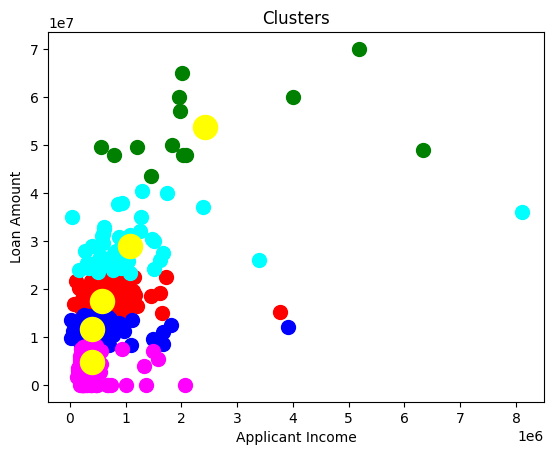

In [ ]:
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

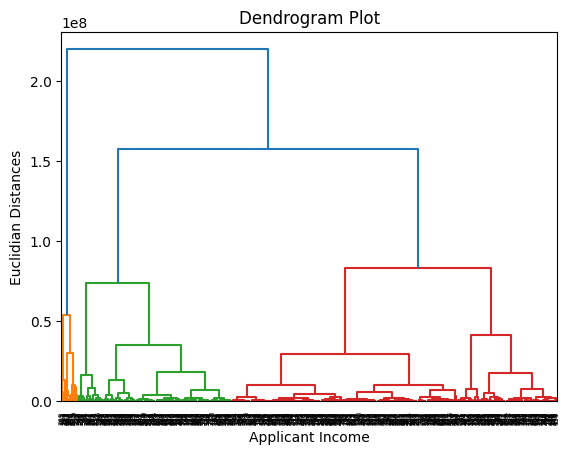

In [ ]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidian Distances")
plt.xlabel("Applicant Income")
plt.show()

In [ ]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')

y_kmeans = hc.fit(X)
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5292872132818283

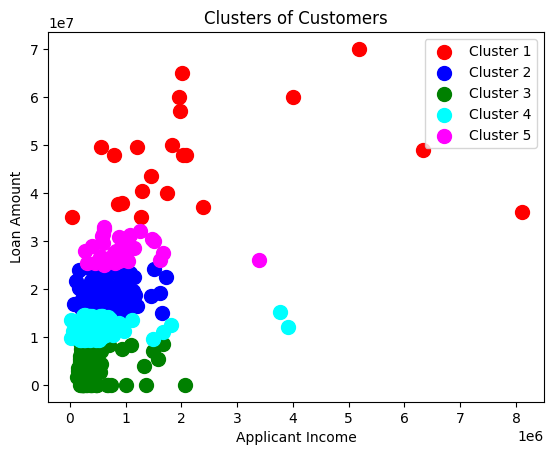

In [ ]:
#visualizing the clusters
y_kmeans = hc.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Clusters of Customers')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()